In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
"""
file_path = os.path.realpath('D:/AiffelNode/Project/GD7/translator_seq2seq/data/fra.txt')
lines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')
print('전체 샘플의 수 :',len(lines))
lines.sample(5) #샘플 5개 출력
"""

"\nfile_path = os.path.realpath('D:/AiffelNode/Project/GD7/translator_seq2seq/data/fra.txt')\nlines = pd.read_csv(file_path, names=['eng', 'fra', 'cc'], sep='\t')\nprint('전체 샘플의 수 :',len(lines))\nlines.sample(5) #샘플 5개 출력\n"

In [3]:
"""
lines = lines[['eng', 'fra']][:50000] # 5만개 샘플 사용
lines.sample(5)
"""

"\nlines = lines[['eng', 'fra']][:50000] # 5만개 샘플 사용\nlines.sample(5)\n"

In [4]:
"""
# 시작 토큰과 종료 토큰 추가
sos_token = '\t'
eos_token = '\n'
lines.fra = lines.fra.apply(lambda x : '\t '+ x + ' \n')
print('전체 샘플의 수 :',len(lines))
lines.sample(5)
"""

"\n# 시작 토큰과 종료 토큰 추가\nsos_token = '\t'\neos_token = '\n'\nlines.fra = lines.fra.apply(lambda x : '\t '+ x + ' \n')\nprint('전체 샘플의 수 :',len(lines))\nlines.sample(5)\n"

In [5]:
"""
eng_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
eng_tokenizer.fit_on_texts(lines.eng)               # 50000개의 행을 가진 eng의 각 행에 토큰화를 수행
input_text = eng_tokenizer.texts_to_sequences(lines.eng)    # 단어를 숫자값 인덱스로 변환하여 저장
input_text[:3]
"""

'\neng_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. \neng_tokenizer.fit_on_texts(lines.eng)               # 50000개의 행을 가진 eng의 각 행에 토큰화를 수행\ninput_text = eng_tokenizer.texts_to_sequences(lines.eng)    # 단어를 숫자값 인덱스로 변환하여 저장\ninput_text[:3]\n'

In [6]:
"""
fra_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. 
fra_tokenizer.fit_on_texts(lines.fra)                 # 50000개의 행을 가진 fra의 각 행에 토큰화를 수행
target_text = fra_tokenizer.texts_to_sequences(lines.fra)     # 단어를 숫자값 인덱스로 변환하여 저장
target_text[:3]
"""

'\nfra_tokenizer = Tokenizer(char_level=True)   # 문자 단위로 Tokenizer를 생성합니다. \nfra_tokenizer.fit_on_texts(lines.fra)                 # 50000개의 행을 가진 fra의 각 행에 토큰화를 수행\ntarget_text = fra_tokenizer.texts_to_sequences(lines.fra)     # 단어를 숫자값 인덱스로 변환하여 저장\ntarget_text[:3]\n'

In [7]:
"""
eng_vocab_size = len(eng_tokenizer.word_index) + 1
fra_vocab_size = len(fra_tokenizer.word_index) + 1
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)
"""

"\neng_vocab_size = len(eng_tokenizer.word_index) + 1\nfra_vocab_size = len(fra_tokenizer.word_index) + 1\nprint('영어 단어장의 크기 :', eng_vocab_size)\nprint('프랑스어 단어장의 크기 :', fra_vocab_size)\n"

In [8]:
"""
max_eng_seq_len = max([len(line) for line in input_text])
max_fra_seq_len = max([len(line) for line in target_text])
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)
"""

"\nmax_eng_seq_len = max([len(line) for line in input_text])\nmax_fra_seq_len = max([len(line) for line in target_text])\nprint('영어 시퀀스의 최대 길이', max_eng_seq_len)\nprint('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)\n"

In [9]:
"""
print('전체 샘플의 수 :',len(lines))
print('영어 단어장의 크기 :', eng_vocab_size)
print('프랑스어 단어장의 크기 :', fra_vocab_size)
print('영어 시퀀스의 최대 길이', max_eng_seq_len)
print('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)
"""

"\nprint('전체 샘플의 수 :',len(lines))\nprint('영어 단어장의 크기 :', eng_vocab_size)\nprint('프랑스어 단어장의 크기 :', fra_vocab_size)\nprint('영어 시퀀스의 최대 길이', max_eng_seq_len)\nprint('프랑스어 시퀀스의 최대 길이', max_fra_seq_len)\n"

In [10]:
"""
encoder_input = input_text
# 종료 토큰 제거
decoder_input = [[ char for char in line if char != fra_tokenizer.word_index[eos_token] ] for line in target_text] 
# 시작 토큰 제거
decoder_target = [[ char for char in line if char != fra_tokenizer.word_index[sos_token] ] for line in target_text]
"""

'\nencoder_input = input_text\n# 종료 토큰 제거\ndecoder_input = [[ char for char in line if char != fra_tokenizer.word_index[eos_token] ] for line in target_text] \n# 시작 토큰 제거\ndecoder_target = [[ char for char in line if char != fra_tokenizer.word_index[sos_token] ] for line in target_text]\n'

In [11]:
"""
print(decoder_input[:3])
print(decoder_target[:3])
"""

'\nprint(decoder_input[:3])\nprint(decoder_target[:3])\n'

In [12]:
"""
encoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')
decoder_input = pad_sequences(decoder_input, maxlen = max_fra_seq_len, padding='post')
decoder_target = pad_sequences(decoder_target, maxlen = max_fra_seq_len, padding='post')
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))
"""

"\nencoder_input = pad_sequences(encoder_input, maxlen = max_eng_seq_len, padding='post')\ndecoder_input = pad_sequences(decoder_input, maxlen = max_fra_seq_len, padding='post')\ndecoder_target = pad_sequences(decoder_target, maxlen = max_fra_seq_len, padding='post')\nprint('영어 데이터의 크기(shape) :',np.shape(encoder_input))\nprint('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))\nprint('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))\n"

In [13]:
#print(encoder_input[0])

In [14]:
"""
encoder_input = to_categorical(encoder_input)
decoder_input = to_categorical(decoder_input)
decoder_target = to_categorical(decoder_target)
print('영어 데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))
"""

"\nencoder_input = to_categorical(encoder_input)\ndecoder_input = to_categorical(decoder_input)\ndecoder_target = to_categorical(decoder_target)\nprint('영어 데이터의 크기(shape) :',np.shape(encoder_input))\nprint('프랑스어 입력데이터의 크기(shape) :',np.shape(decoder_input))\nprint('프랑스어 출력데이터의 크기(shape) :',np.shape(decoder_target))\n"

In [15]:
"""
n_of_val = 3000

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('영어 학습데이터의 크기(shape) :',np.shape(encoder_input))
print('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input))
print('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target))
"""

"\nn_of_val = 3000\n\nencoder_input_train = encoder_input[:-n_of_val]\ndecoder_input_train = decoder_input[:-n_of_val]\ndecoder_target_train = decoder_target[:-n_of_val]\n\nencoder_input_test = encoder_input[-n_of_val:]\ndecoder_input_test = decoder_input[-n_of_val:]\ndecoder_target_test = decoder_target[-n_of_val:]\n\nprint('영어 학습데이터의 크기(shape) :',np.shape(encoder_input))\nprint('프랑스어 학습 입력데이터의 크기(shape) :',np.shape(decoder_input))\nprint('프랑스어 학습 출력데이터의 크기(shape) :',np.shape(decoder_target))\n"

In [16]:
"""
# 입력 텐서 생성.
encoder_inputs = Input(shape=(None, eng_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
encoder_lstm = LSTM(units = 256, return_state = True)
# 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.
encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.
encoder_states = [state_h, state_c]
"""

'\n# 입력 텐서 생성.\nencoder_inputs = Input(shape=(None, eng_vocab_size))\n# hidden size가 256인 인코더의 LSTM 셀 생성\nencoder_lstm = LSTM(units = 256, return_state = True)\n# 디코더로 전달할 hidden state, cell state를 리턴. encoder_outputs은 여기서는 불필요.\nencoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)\n# hidden state와 cell state를 다음 time step으로 전달하기 위해서 별도 저장.\nencoder_states = [state_h, state_c]\n'

In [17]:
"""
# 입력 텐서 생성.
decoder_inputs = Input(shape=(None, fra_vocab_size))
# hidden size가 256인 인코더의 LSTM 셀 생성
decoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True)
# decoder_outputs는 모든 time step의 hidden state
decoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state = encoder_states)
"""

'\n# 입력 텐서 생성.\ndecoder_inputs = Input(shape=(None, fra_vocab_size))\n# hidden size가 256인 인코더의 LSTM 셀 생성\ndecoder_lstm = LSTM(units = 256, return_sequences = True, return_state=True)\n# decoder_outputs는 모든 time step의 hidden state\ndecoder_outputs, _, _= decoder_lstm(decoder_inputs, initial_state = encoder_states)\n'

In [18]:
"""
decoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')
decoder_outputs = decoder_softmax_layer(decoder_outputs)
"""

"\ndecoder_softmax_layer = Dense(fra_vocab_size, activation='softmax')\ndecoder_outputs = decoder_softmax_layer(decoder_outputs)\n"

In [19]:
"""
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(optimizer="rmsprop", loss="categorical_crossentropy")
model.summary()
"""

'\nmodel = Model([encoder_inputs, decoder_inputs], decoder_outputs)\nmodel.compile(optimizer="rmsprop", loss="categorical_crossentropy")\nmodel.summary()\n'

In [20]:
"""
model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size=128, epochs=50)
"""

'\nmodel.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train,           validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),\n          batch_size=128, epochs=50)\n'

In [21]:
"""
encoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)
encoder_model.summary()
"""

'\nencoder_model = Model(inputs = encoder_inputs, outputs = encoder_states)\nencoder_model.summary()\n'

In [22]:
"""
# 이전 time step의 hidden state를 저장하는 텐서
decoder_state_input_h = Input(shape=(256,))
# 이전 time step의 cell state를 저장하는 텐서
decoder_state_input_c = Input(shape=(256,))
# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# decoder_states_inputs를 현재 time step의 초기 상태로 사용.
# 구체적인 동작 자체는 def decode_sequence()에 구현.
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)
# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장.
decoder_states = [state_h, state_c]
"""

'\n# 이전 time step의 hidden state를 저장하는 텐서\ndecoder_state_input_h = Input(shape=(256,))\n# 이전 time step의 cell state를 저장하는 텐서\ndecoder_state_input_c = Input(shape=(256,))\n# 이전 time step의 hidden state와 cell state를 하나의 변수에 저장\ndecoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]\n\n# decoder_states_inputs를 현재 time step의 초기 상태로 사용.\n# 구체적인 동작 자체는 def decode_sequence()에 구현.\ndecoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)\n# 현재 time step의 hidden state와 cell state를 하나의 변수에 저장.\ndecoder_states = [state_h, state_c]\n'

In [23]:
"""
decoder_outputs = decoder_softmax_layer(decoder_outputs)
decoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)
decoder_model.summary()
"""

'\ndecoder_outputs = decoder_softmax_layer(decoder_outputs)\ndecoder_model = Model(inputs=[decoder_inputs] + decoder_states_inputs, outputs=[decoder_outputs] + decoder_states)\ndecoder_model.summary()\n'

In [24]:
"""
eng2idx = eng_tokenizer.word_index
fra2idx = fra_tokenizer.word_index
idx2eng = eng_tokenizer.index_word
idx2fra = fra_tokenizer.index_word
"""

'\neng2idx = eng_tokenizer.word_index\nfra2idx = fra_tokenizer.word_index\nidx2eng = eng_tokenizer.index_word\nidx2fra = fra_tokenizer.index_word\n'

In [25]:
"""
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    states_value = encoder_model.predict(input_seq)

    # <SOS>에 해당하는 원-핫 벡터 생성
    target_seq = np.zeros((1, 1, fra_vocab_size))
    target_seq[0, 0, fra2idx['\t']] = 1.

    stop_condition = False
    decoded_sentence = ""

    # stop_condition이 True가 될 때까지 루프 반복
    while not stop_condition:
        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # 예측 결과를 문자로 변환
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = idx2fra[sampled_token_index]

        # 현재 시점의 예측 문자를 예측 문장에 추가
        decoded_sentence += sampled_char

        # <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_fra_seq_len):
            stop_condition = True

        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
        target_seq = np.zeros((1, 1, fra_vocab_size))
        target_seq[0, 0, sampled_token_index] = 1.

        # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
        states_value = [h, c]

    return decoded_sentence
"""

'\ndef decode_sequence(input_seq):\n    # 입력으로부터 인코더의 상태를 얻음\n    states_value = encoder_model.predict(input_seq)\n\n    # <SOS>에 해당하는 원-핫 벡터 생성\n    target_seq = np.zeros((1, 1, fra_vocab_size))\n    target_seq[0, 0, fra2idx[\'\t\']] = 1.\n\n    stop_condition = False\n    decoded_sentence = ""\n\n    # stop_condition이 True가 될 때까지 루프 반복\n    while not stop_condition:\n        # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용\n        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)\n\n        # 예측 결과를 문자로 변환\n        sampled_token_index = np.argmax(output_tokens[0, -1, :])\n        sampled_char = idx2fra[sampled_token_index]\n\n        # 현재 시점의 예측 문자를 예측 문장에 추가\n        decoded_sentence += sampled_char\n\n        # <eos>에 도달하거나 최대 길이를 넘으면 중단.\n        if (sampled_char == \'\n\' or\n           len(decoded_sentence) > max_fra_seq_len):\n            stop_condition = True\n\n        # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장\n        target_seq = np.zeros((1, 1, fra_vocab_size

In [26]:
"""
for seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스 (자유롭게 선택해 보세요)
    input_seq = encoder_input[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print(35 * "-")
    print('입력 문장:', lines.eng[seq_index])
    print('정답 문장:', lines.fra[seq_index][1:len(lines.fra[seq_index])-1]) # '\t'와 '\n'을 빼고 출력
    print('번역기가 번역한 문장:', decoded_sentence[:len(decoded_sentence)-1]) # '\n'을 빼고 출력
"""

'\nfor seq_index in [3,50,100,300,1001]: # 입력 문장의 인덱스 (자유롭게 선택해 보세요)\n    input_seq = encoder_input[seq_index: seq_index + 1]\n    decoded_sentence = decode_sequence(input_seq)\n    print(35 * "-")\n    print(\'입력 문장:\', lines.eng[seq_index])\n    print(\'정답 문장:\', lines.fra[seq_index][1:len(lines.fra[seq_index])-1]) # \'\t\'와 \'\n\'을 빼고 출력\n    print(\'번역기가 번역한 문장:\', decoded_sentence[:len(decoded_sentence)-1]) # \'\n\'을 빼고 출력\n'

In [27]:
import tensorflow

print(tensorflow.__version__)

2.10.1


In [28]:
import re
import unicodedata
import urllib3

num_samples = 50000
# 입력된 문장을
#     1. 소문자로 바꾸고, 양쪽 공백을 지웁니다
#     2. 특수문자 양쪽에 공백을 넣고
#     3. 여러개의 공백은 하나의 공백으로 바꿉니다
#     4. a-zA-Z?.!,¿가 아닌 모든 문자를 하나의 공백으로 바꿉니다
#     5. 다시 양쪽 공백을 지웁니다
#     6. 문장 시작에는 <start>, 끝에는 <end>를 추가합니다
# 이 순서로 처리해주면 문제가 되는 상황을 방지할 수 있겠네요!
"""
def preprocess_sentence(sentence):
    sentence = sentence.lower().strip() # 1
    sentence = re.sub(r"([?.!,¿])", r" \1 ", sentence) # 2
    sentence = re.sub(r'[" "]+', " ", sentence) # 3
    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4
    sentence = sentence.strip() # 5
    sentence = '<start> ' + sentence + ' <end>' # 6
    return sentence

# 이 문장이 어떻게 필터링되는지 확인해 보세요.
print(preprocess_sentence("This @_is ;;;sample        sentence."))
"""

'\ndef preprocess_sentence(sentence):\n    sentence = sentence.lower().strip() # 1\n    sentence = re.sub(r"([?.!,¿])", r" \x01 ", sentence) # 2\n    sentence = re.sub(r\'[" "]+\', " ", sentence) # 3\n    sentence = re.sub(r"[^a-zA-Z?.!,¿]+", " ", sentence) # 4\n    sentence = sentence.strip() # 5\n    sentence = \'<start> \' + sentence + \' <end>\' # 6\n    return sentence\n\n# 이 문장이 어떻게 필터링되는지 확인해 보세요.\nprint(preprocess_sentence("This @_is ;;;sample        sentence."))\n'

In [29]:
def to_ascii(s):
  # 프랑스어 악센트(accent) 삭제
  # 예시 : 'déjà diné' -> deja dine
  return ''.join(c for c in unicodedata.normalize('NFD', s)
                   if unicodedata.category(c) != 'Mn')
  
  
def preprocess_sentence(sent):
  # 악센트 제거 함수 호출
  sent = to_ascii(sent.lower())

  # 단어와 구두점 사이에 공백 추가.
  # ex) "I am a student." => "I am a student ."
  sent = re.sub(r"([?.!,¿])", r" \1", sent)

  # (a-z, A-Z, ".", "?", "!", ",") 이들을 제외하고는 전부 공백으로 변환.
  sent = re.sub(r"[^a-zA-Z!.?]+", r" ", sent)

  # 다수 개의 공백을 하나의 공백으로 치환
  sent = re.sub(r"\s+", " ", sent)
  return sent

In [30]:
file_path = os.path.realpath('D:/AiffelNode/Project/GD7/translator_seq2seq/data/fra.txt')
def load_preprocessed_data():
  encoder_input, decoder_input, decoder_target = [], [], []

  with open(file_path, "r") as lines:
    for i, line in enumerate(lines):
      # source 데이터와 target 데이터 분리
      src_line, tar_line, _ = line.strip().split('\t')

      # source 데이터 전처리
      src_line = [w for w in preprocess_sentence(src_line).split()]

      # target 데이터 전처리
      tar_line = preprocess_sentence(tar_line)
      tar_line_in = [w for w in ("<sos> " + tar_line).split()]
      tar_line_out = [w for w in (tar_line + " <eos>").split()]

      encoder_input.append(src_line)
      decoder_input.append(tar_line_in)
      decoder_target.append(tar_line_out)

      if i == num_samples - 1:
        break

  return encoder_input, decoder_input, decoder_target

In [31]:
sents_en_in, sents_fra_in, sents_fra_out = load_preprocessed_data()

In [32]:
tokenizer_en = Tokenizer(filters="", lower=False)
tokenizer_en.fit_on_texts(sents_en_in)
encoder_input = tokenizer_en.texts_to_sequences(sents_en_in)
encoder_input = pad_sequences(encoder_input, padding="post")

tokenizer_fra = Tokenizer(filters="", lower=False)
tokenizer_fra.fit_on_texts(sents_fra_in)
tokenizer_fra.fit_on_texts(sents_fra_out)

decoder_input = tokenizer_fra.texts_to_sequences(sents_fra_in)
decoder_input = pad_sequences(decoder_input, padding="post")

decoder_target = tokenizer_fra.texts_to_sequences(sents_fra_out)
decoder_target = pad_sequences(decoder_target, padding="post")

In [33]:
print('인코더의 입력의 크기(shape) :',encoder_input.shape)
print('디코더의 입력의 크기(shape) :',decoder_input.shape)
print('디코더의 레이블의 크기(shape) :',decoder_target.shape)

인코더의 입력의 크기(shape) : (50000, 8)
디코더의 입력의 크기(shape) : (50000, 17)
디코더의 레이블의 크기(shape) : (50000, 17)


In [34]:
src_vocab_size = len(tokenizer_en.word_index) + 1
tar_vocab_size = len(tokenizer_fra.word_index) + 1
print("영어 단어 집합의 크기 : {:d}, 프랑스어 단어 집합의 크기 : {:d}".format(src_vocab_size, tar_vocab_size))

영어 단어 집합의 크기 : 5921, 프랑스어 단어 집합의 크기 : 10140


In [35]:
src_to_index = tokenizer_en.word_index
index_to_src = tokenizer_en.index_word
tar_to_index = tokenizer_fra.word_index
index_to_tar = tokenizer_fra.index_word

In [36]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print('랜덤 시퀀스 :',indices)

랜덤 시퀀스 : [18518 13609  6210 ...  3645  3443 17096]


In [37]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [38]:
encoder_input[30997]

array([720,   1,   0,   0,   0,   0,   0,   0])

In [39]:
decoder_input[30997]

array([   2, 1256,   14,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [40]:
decoder_target[30997]

array([1256,   14,    3,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0])

In [41]:
n_of_val = int(num_samples*0.1)
print('검증 데이터의 개수 :',n_of_val)

검증 데이터의 개수 : 5000


In [42]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

In [43]:
print('훈련 source 데이터의 크기 :',encoder_input_train.shape)
print('훈련 target 데이터의 크기 :',decoder_input_train.shape)
print('훈련 target 레이블의 크기 :',decoder_target_train.shape)
print('테스트 source 데이터의 크기 :',encoder_input_test.shape)
print('테스트 target 데이터의 크기 :',decoder_input_test.shape)
print('테스트 target 레이블의 크기 :',decoder_target_test.shape)

훈련 source 데이터의 크기 : (45000, 8)
훈련 target 데이터의 크기 : (45000, 17)
훈련 target 레이블의 크기 : (45000, 17)
테스트 source 데이터의 크기 : (5000, 8)
테스트 target 데이터의 크기 : (5000, 17)
테스트 target 레이블의 크기 : (5000, 17)


In [44]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Masking
from tensorflow.keras.models import Model

In [45]:
embedding_dim = 64
hidden_units = 64

In [46]:
# 인코더
encoder_inputs = Input(shape=(None,))
enc_emb = Embedding(src_vocab_size, embedding_dim)(encoder_inputs) # 임베딩 층
enc_masking = Masking(mask_value=0.0)(enc_emb) # 패딩 0은 연산에서 제외
encoder_lstm = LSTM(hidden_units, return_state=True) # 상태값 리턴을 위해 return_state는 True
encoder_outputs, state_h, state_c = encoder_lstm(enc_masking) # 은닉 상태와 셀 상태를 리턴
encoder_states = [state_h, state_c] # 인코더의 은닉 상태와 셀 상태를 저장

In [47]:
# 디코더
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(tar_vocab_size, hidden_units) # 임베딩 층
dec_emb = dec_emb_layer(decoder_inputs) # 패딩 0은 연산에서 제외
dec_masking = Masking(mask_value=0.0)(dec_emb)

# 상태값 리턴을 위해 return_state는 True, 모든 시점에 대해서 단어를 예측하기 위해 return_sequences는 True
decoder_lstm = LSTM(hidden_units, return_sequences=True, return_state=True) 

# 인코더의 은닉 상태를 초기 은닉 상태(initial_state)로 사용
decoder_outputs, _, _ = decoder_lstm(dec_masking,
                                     initial_state=encoder_states)

# 모든 시점의 결과에 대해서 소프트맥스 함수를 사용한 출력층을 통해 단어 예측
decoder_dense = Dense(tar_vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# 모델의 입력과 출력을 정의.
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [48]:
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
    batch_size=128, epochs=200)
print(history.history)

Epoch 1/200
352/352 [==============================] - 24s 33ms/step - loss: 2.9295 - acc: 0.6250 - val_loss: 1.8765 - val_acc: 0.6903
Epoch 2/200
352/352 [==============================] - 10s 27ms/step - loss: 1.7249 - acc: 0.7337 - val_loss: 1.6325 - val_acc: 0.7484
Epoch 3/200
352/352 [==============================] - 9s 26ms/step - loss: 1.5337 - acc: 0.7554 - val_loss: 1.4872 - val_acc: 0.7603
Epoch 4/200
352/352 [==============================] - 9s 26ms/step - loss: 1.4102 - acc: 0.7715 - val_loss: 1.3805 - val_acc: 0.7788
Epoch 5/200
352/352 [==============================] - 9s 25ms/step - loss: 1.3030 - acc: 0.7925 - val_loss: 1.2913 - val_acc: 0.7959
Epoch 6/200
352/352 [==============================] - 9s 24ms/step - loss: 1.2135 - acc: 0.8048 - val_loss: 1.2158 - val_acc: 0.8076
Epoch 7/200
352/352 [==============================] - 8s 23ms/step - loss: 1.1384 - acc: 0.8141 - val_loss: 1.1570 - val_acc: 0.8139
Epoch 8/200
352/352 [==============================] - 9s 25

In [49]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


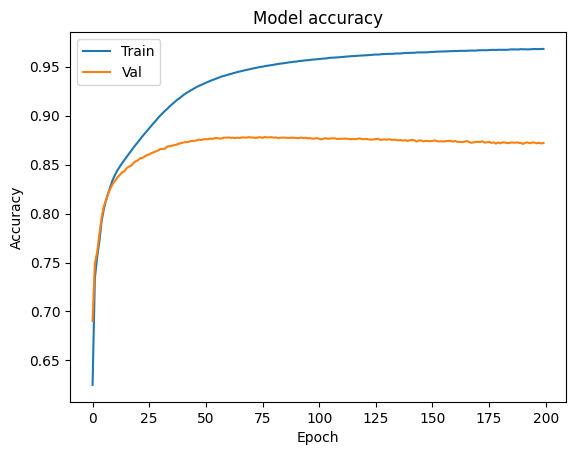

In [50]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

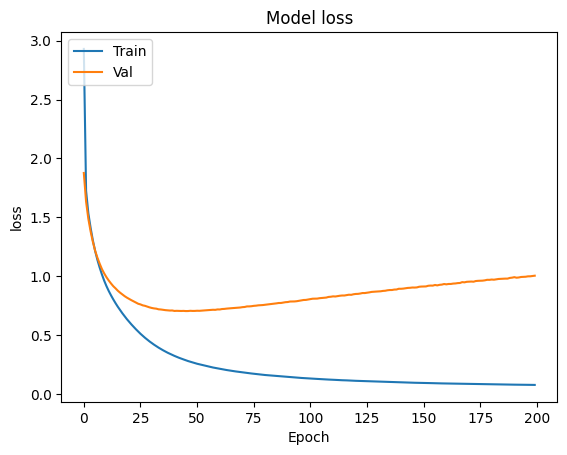

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [52]:
# 인코더
encoder_model = Model(encoder_inputs, encoder_states)

# 디코더 설계 시작
# 이전 시점의 상태를 보관할 텐서
decoder_state_input_h = Input(shape=(hidden_units,))
decoder_state_input_c = Input(shape=(hidden_units,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

# 훈련 때 사용했던 임베딩 층을 재사용
dec_emb2 = dec_emb_layer(decoder_inputs)

# 다음 단어 예측을 위해 이전 시점의 상태를 현 시점의 초기 상태로 사용
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]

# 모든 시점에 대해서 단어 예측
decoder_outputs2 = decoder_dense(decoder_outputs2)

# 수정된 디코더
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [53]:
def decode_sequence(input_seq):
  # 입력으로부터 인코더의 마지막 시점의 상태(은닉 상태, 셀 상태)를 얻음
  states_value = encoder_model.predict(input_seq)

  # <SOS>에 해당하는 정수 생성
  target_seq = np.zeros((1,1))
  target_seq[0, 0] = tar_to_index['<sos>']

  stop_condition = False
  decoded_sentence = ''

  # stop_condition이 True가 될 때까지 루프 반복
  # 구현의 간소화를 위해서 이 함수는 배치 크기를 1로 가정합니다.
  while not stop_condition:
    # 이점 시점의 상태 states_value를 현 시점의 초기 상태로 사용
    output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

    # 예측 결과를 단어로 변환
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_char = index_to_tar[sampled_token_index]

    # 현재 시점의 예측 단어를 예측 문장에 추가
    decoded_sentence += ' '+sampled_char

    # <eos>에 도달하거나 정해진 길이를 넘으면 중단.
    if (sampled_char == '<eos>' or
        len(decoded_sentence) > 50):
        stop_condition = True

    # 현재 시점의 예측 결과를 다음 시점의 입력으로 사용하기 위해 저장
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index

    # 현재 시점의 상태를 다음 시점의 상태로 사용하기 위해 저장
    states_value = [h, c]

  return decoded_sentence

In [54]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_src(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0):
      sentence = sentence + index_to_src[encoded_word] + ' '
  return sentence

# 번역문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq_to_tar(input_seq):
  sentence = ''
  for encoded_word in input_seq:
    if(encoded_word != 0 and encoded_word != tar_to_index['<sos>'] and encoded_word != tar_to_index['<eos>']):
      sentence = sentence + index_to_tar[encoded_word] + ' '
  return sentence

In [55]:
for seq_index in [3, 50, 100, 300, 1001]:
  input_seq = encoder_input_test[seq_index: seq_index + 1]
  decoded_sentence = decode_sequence(input_seq)

  print("입력문장 :",seq_to_src(encoder_input_test[seq_index]))
  print("정답문장 :",seq_to_tar(decoder_input_test[seq_index]))
  print("번역문장 :",decoded_sentence[1:-5])
  print("-"*50)

1/1 [==============================] - 0s 32ms/step
입력문장 : i have asthma . 
정답문장 : j ai de l asthme . 
번역문장 : je suis asthmatique . 
--------------------------------------------------
1/1 [==============================] - 0s 28ms/step
입력문장 : of course . 
정답문장 : pour sur . 
번역문장 : bien sur . 
--------------------------------------------------
1/1 [==============================] - 0s 31ms/step
입력문장 : i m getting nowhere . 
정답문장 : je n arrive a rien . 
번역문장 : je ne peux pas travailler ! 
--------------------------------------------------
1/1 [==============================] - 0s 27ms/step
입력문장 : tom was distressed . 
정답문장 : tom etait secoue . 
번역문장 : tom refusa vite ? 
--------------------------------------------------
1/1 [==============================] - 0s 35ms/step
입력문장 : i was very lucky . 
정답문장 : j ai eu beaucoup de chance . 
번역문장 : j etais beaucoup de l aide . 
--------------------------------------------------


지금 보면 번역이 그래도 잘 되고 있는 것 같다.   
약간의 단어차이가 있을 때도 있지만, 그래도 뜻은 비슷한걸로 보인다.   
참고 문헌: https://wikidocs.net/86900   
